# Reporte analítica de datos - Proyecto de Grado II

## Exploración de los datos para el municipio de BUGA

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
buga = pd.read_csv('../dengue_data/Buga.csv')
df = pd.DataFrame(buga)

### *Número de casos reportados por año*

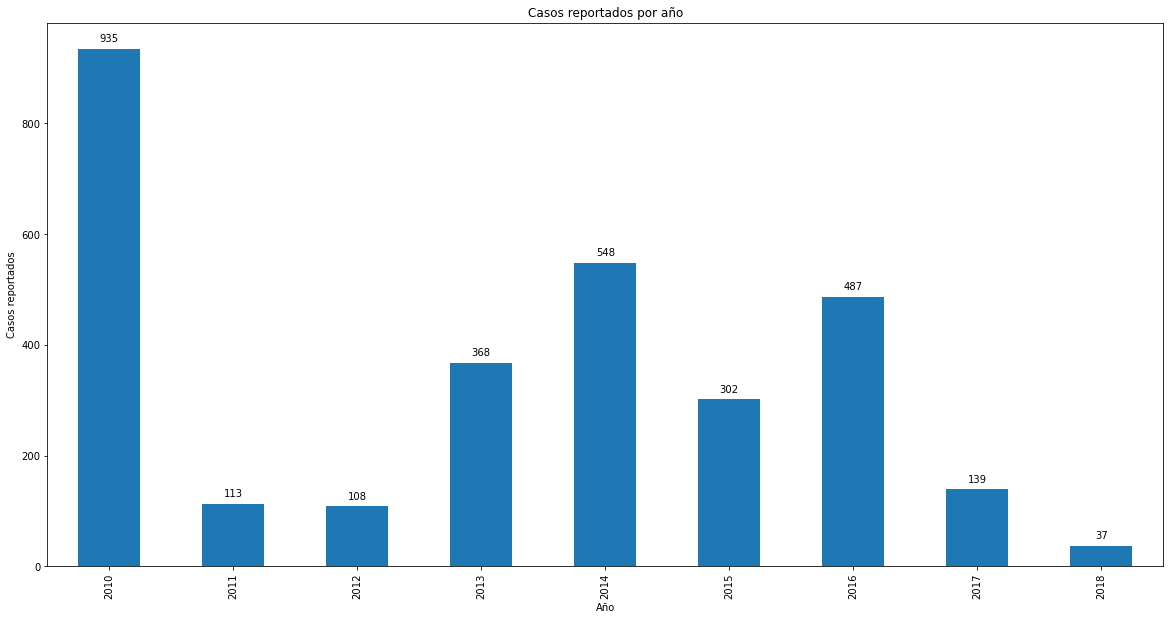

In [32]:
years = df['Ano'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
years.set_xlabel('Año')
years.set_ylabel('Casos reportados')
years.set_title('Casos reportados por año')

for p in years.patches:
    years.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por mes*

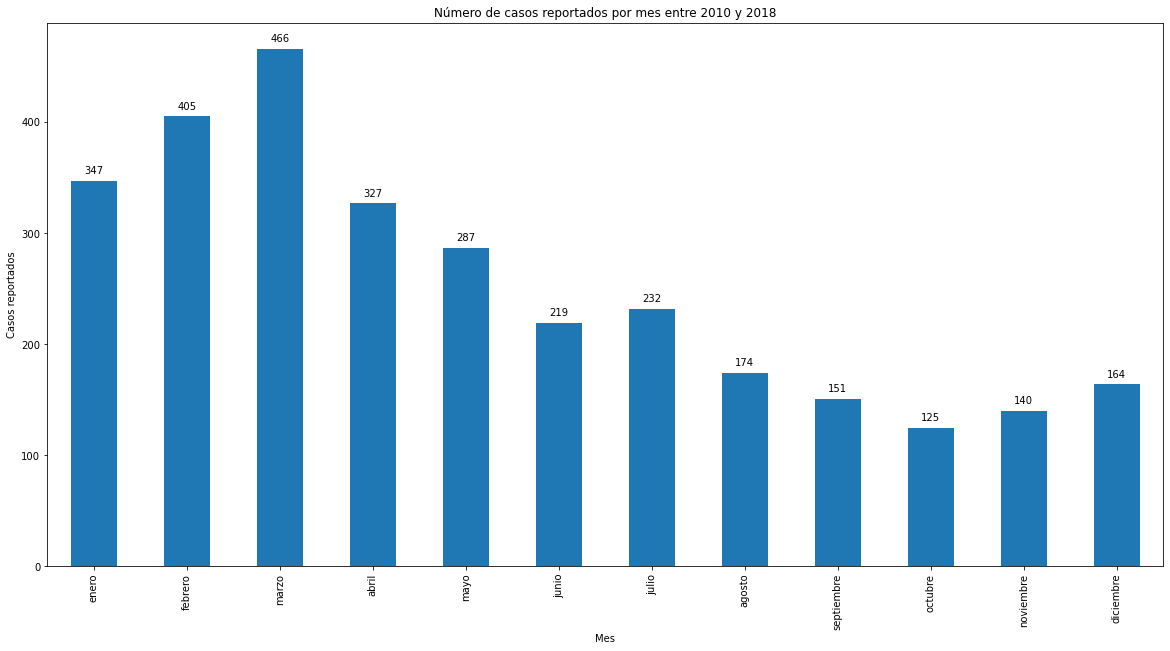

In [31]:
meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", 
          "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]
df['MesOcurrencia'] = pd.Categorical(df['MesOcurrencia'], categories=meses, ordered=True)
df.sort_values(by="MesOcurrencia")

months = df['MesOcurrencia'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
months.set_xlabel('Mes')
months.set_ylabel('Casos reportados')
months.set_title('Número de casos reportados por mes entre 2010 y 2018')

for p in months.patches:
    months.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por mes y año')

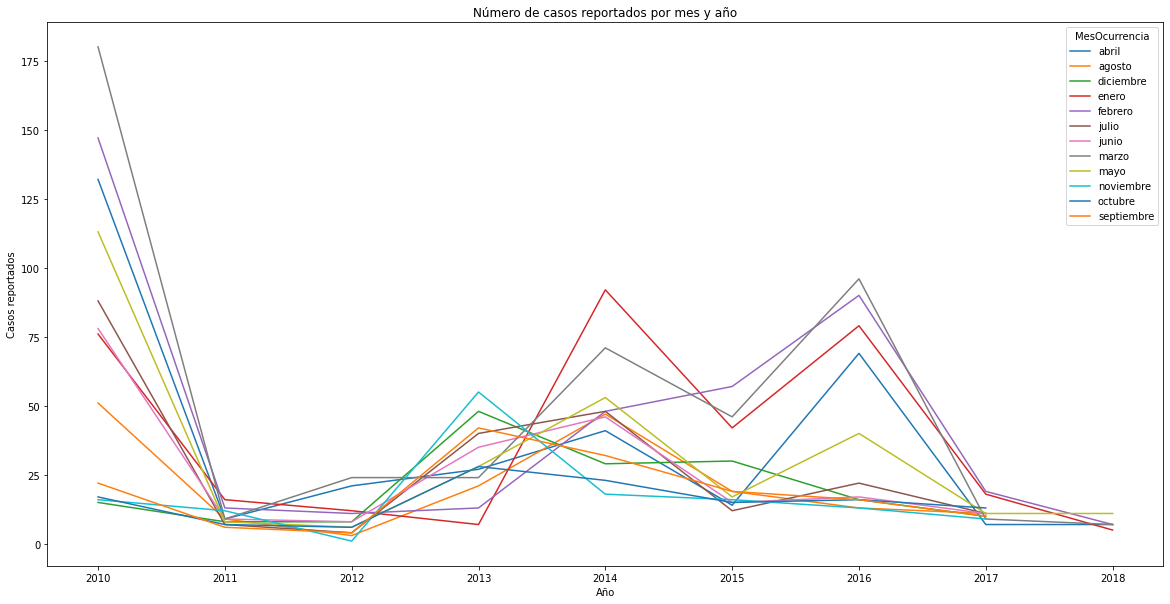

In [5]:
months = buga.groupby(["Ano", 'MesOcurrencia']).size().unstack(level=1).plot(kind='line', figsize=(20,10))
months.set_xlabel('Año')
months.set_ylabel('Casos reportados')
months.set_title('Número de casos reportados por mes y año')

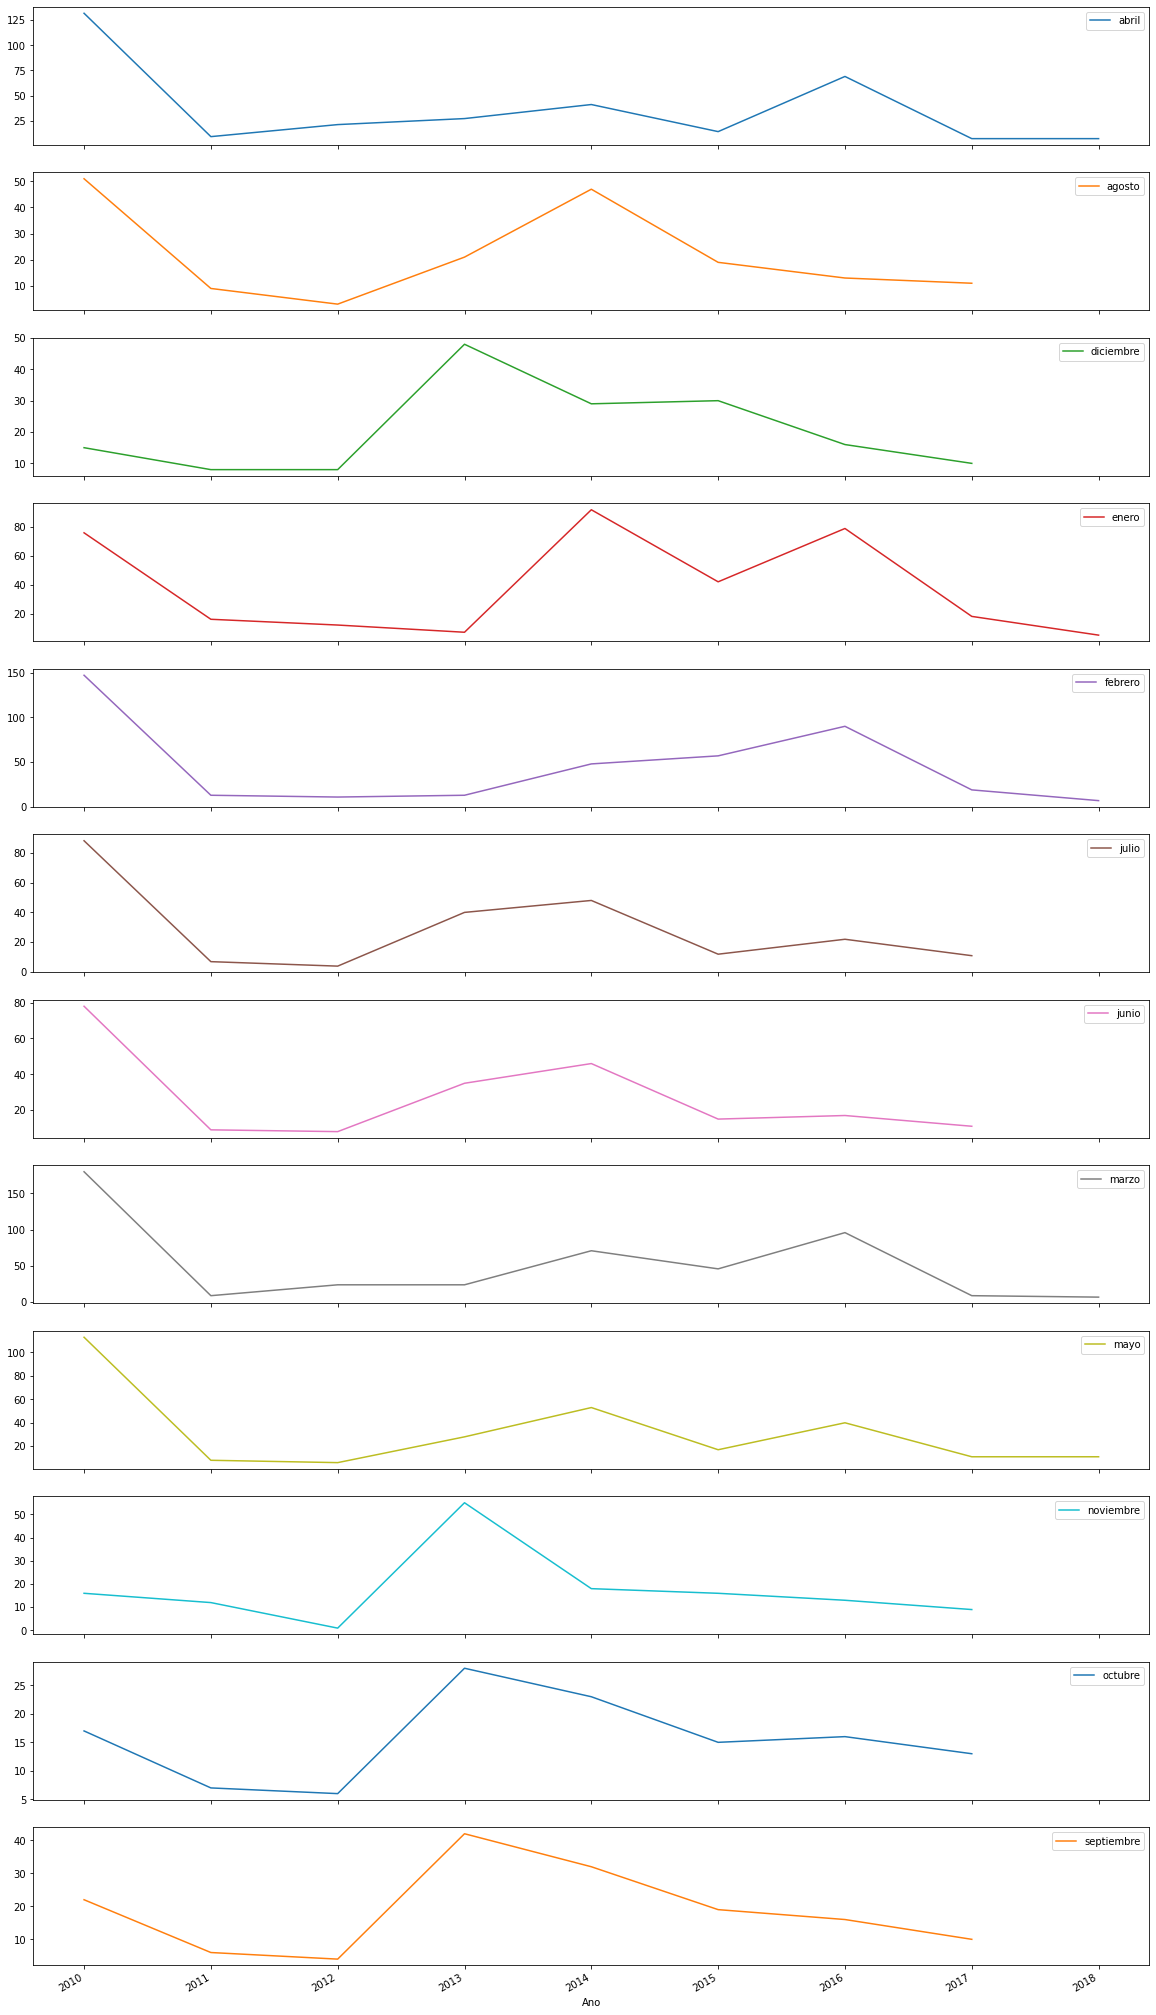

In [37]:
months = buga.groupby(["Ano", 'MesOcurrencia']).size().unstack(level=1).plot(kind='line', figsize=(20,40), subplots=True)


### *Número de casos reportados por sexo*

Text(0.5, 1.0, 'Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018')

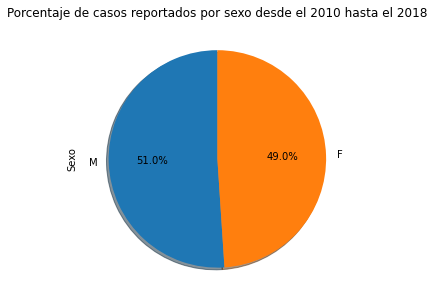

In [7]:
gender = df['Sexo'].value_counts().plot(kind='pie', shadow = True,startangle=90, figsize=(10,5), autopct='%1.1f%%')
gender.set_title("Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018")

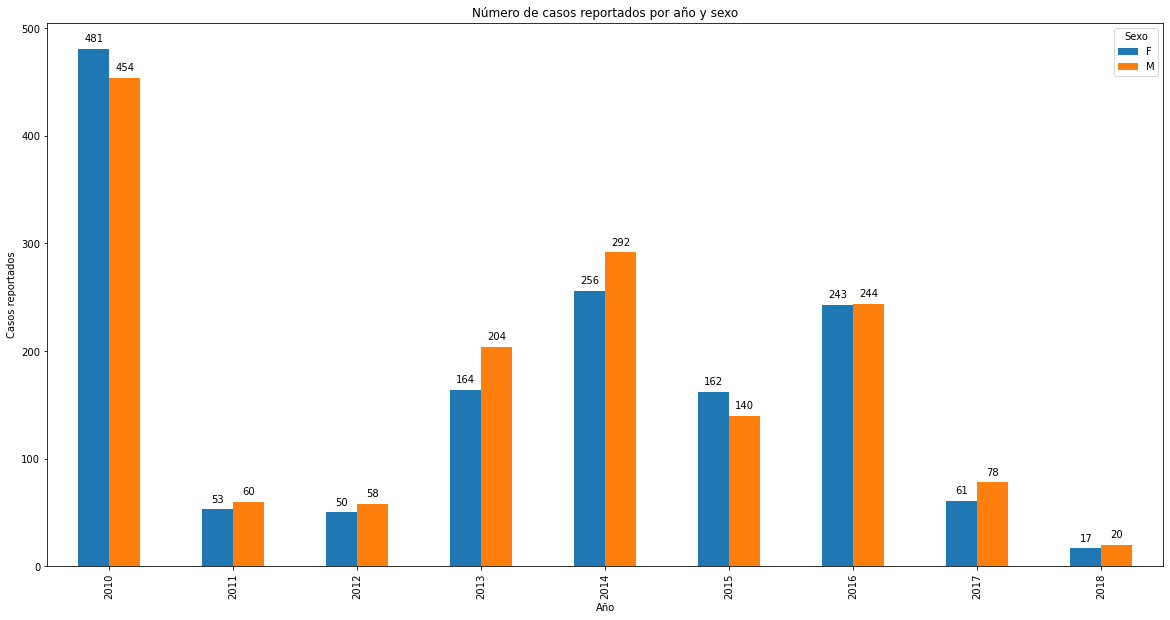

In [8]:
genders_by_year = buga.groupby(["Ano", 'Sexo']).size().unstack(level=1).plot(kind='bar', figsize=(20,10))

genders_by_year.set_xlabel('Año')
genders_by_year.set_ylabel('Casos reportados')
genders_by_year.set_title('Número de casos reportados por año y sexo')

for p in genders_by_year.patches:
    genders_by_year.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

### *Número de casos reportados por comuna*

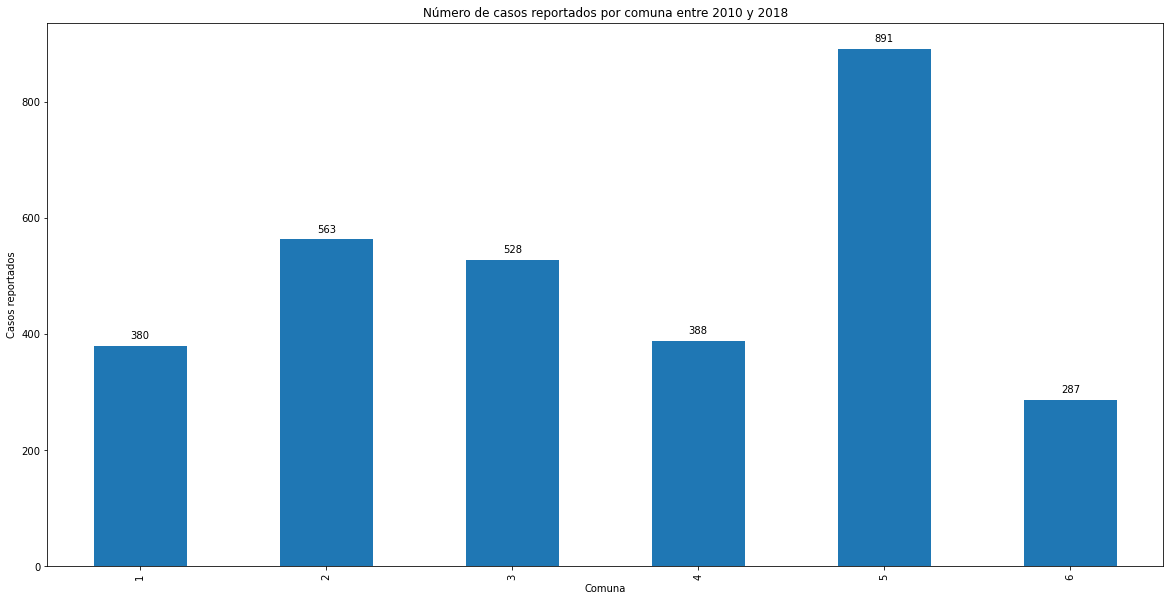

In [9]:
commune = df['Comuna'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
commune.set_xlabel('Comuna')
commune.set_ylabel('Casos reportados')
commune.set_title('Número de casos reportados por comuna entre 2010 y 2018')

for p in commune.patches:
    commune.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y comunas')

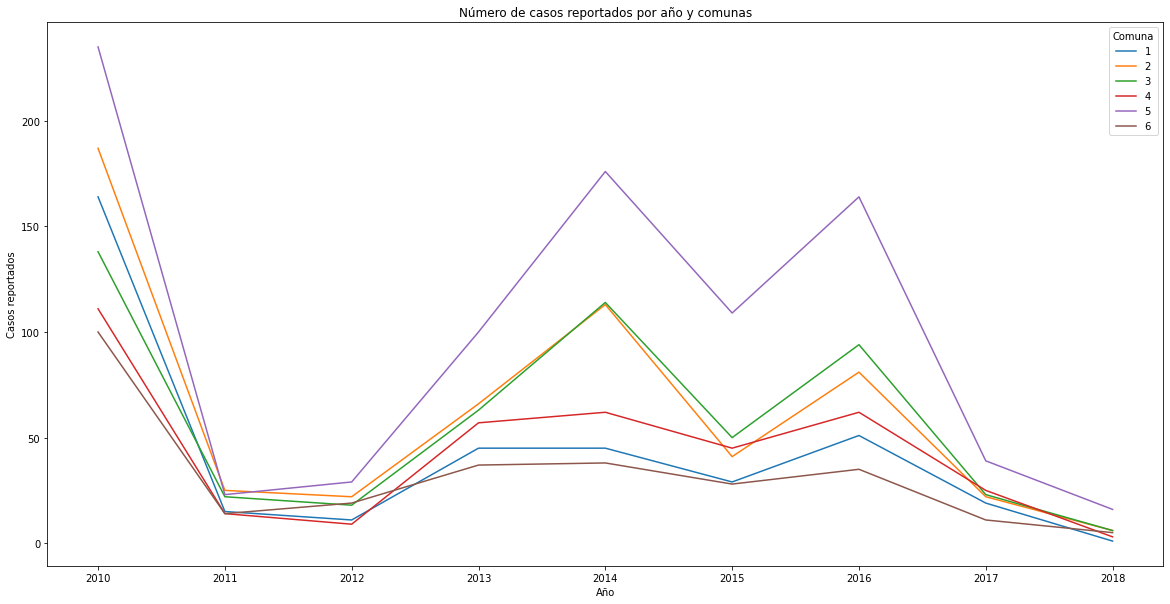

In [10]:
communes_by_year = buga.groupby(["Ano", 'Comuna']).size().unstack(level=1).plot(kind='line', figsize=(20,10))
communes_by_year.set_xlabel('Año')
communes_by_year.set_ylabel('Casos reportados')
communes_by_year.set_title('Número de casos reportados por año y comunas')

### *Número de casos reportados por barrio*

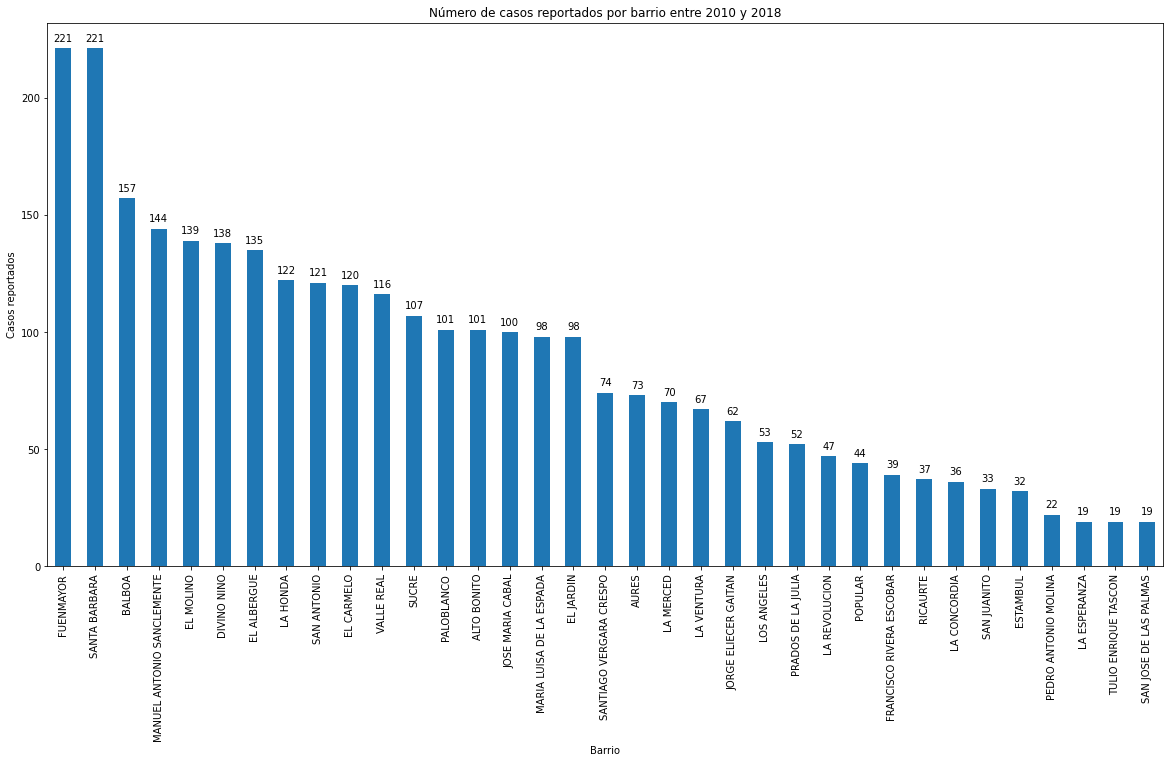

In [11]:
neighborhood = df['Barrio'].value_counts().plot(kind='bar', figsize=(20,10))
neighborhood.set_xlabel('Barrio')
neighborhood.set_ylabel('Casos reportados')
neighborhood.set_title('Número de casos reportados por barrio entre 2010 y 2018')

for p in neighborhood.patches:
    neighborhood.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y barrio')

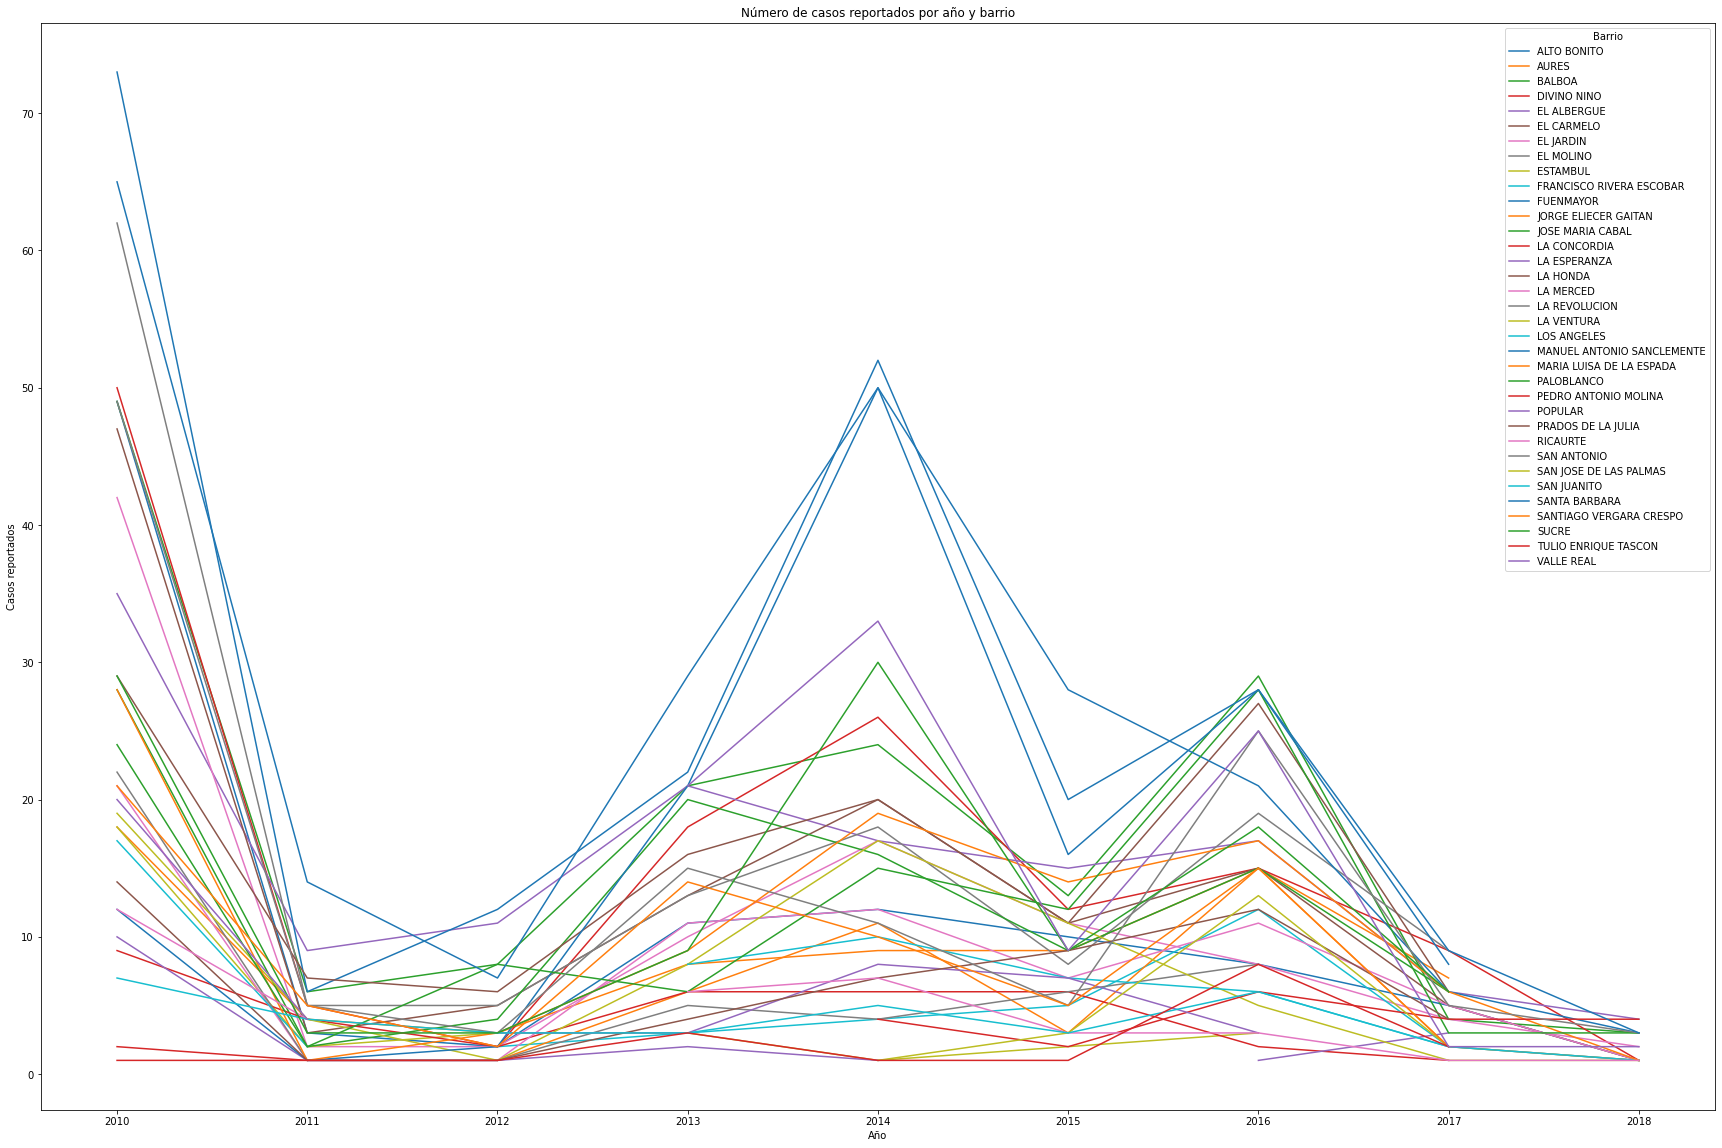

In [12]:
neighborhood_years = buga.groupby(["Ano", 'Barrio']).size().unstack(level=1).plot(kind='line', figsize=(30,20))
neighborhood_years.set_xlabel('Año')
neighborhood_years.set_ylabel('Casos reportados')
neighborhood_years.set_title('Número de casos reportados por año y barrio')

### *Número de casos reportados por rango de edad*

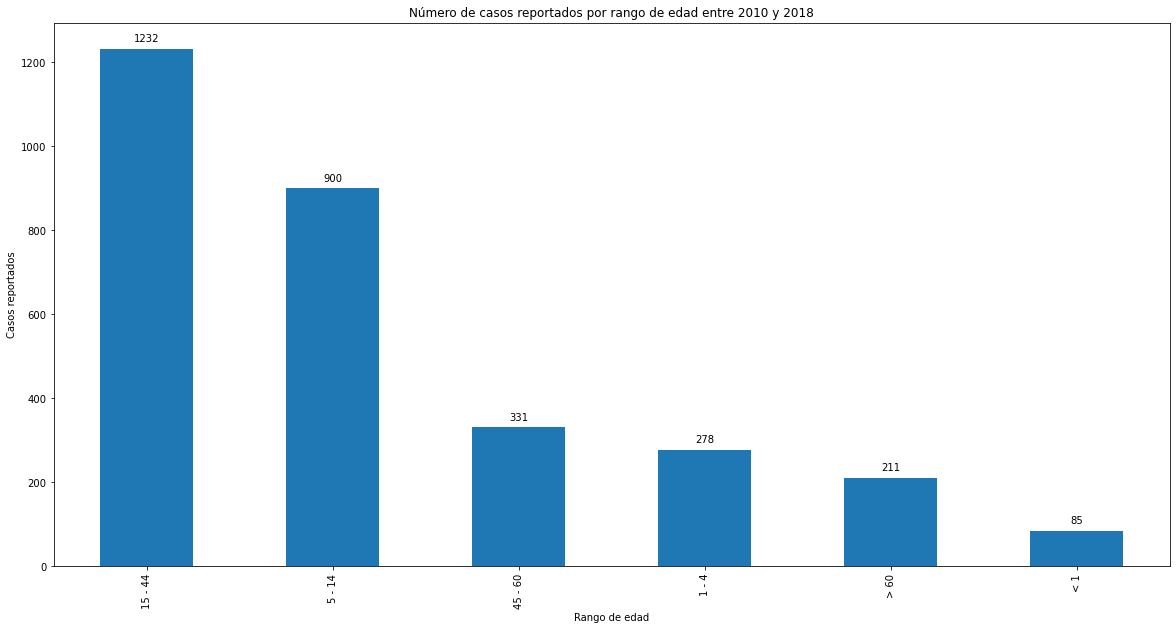

In [13]:
age_range = df['GrupoEdad'].value_counts().plot(kind='bar', figsize=(20,10))
age_range.set_xlabel('Rango de edad')
age_range.set_ylabel('Casos reportados')
age_range.set_title('Número de casos reportados por rango de edad entre 2010 y 2018')

for p in age_range.patches:
    age_range.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y rango de edad')

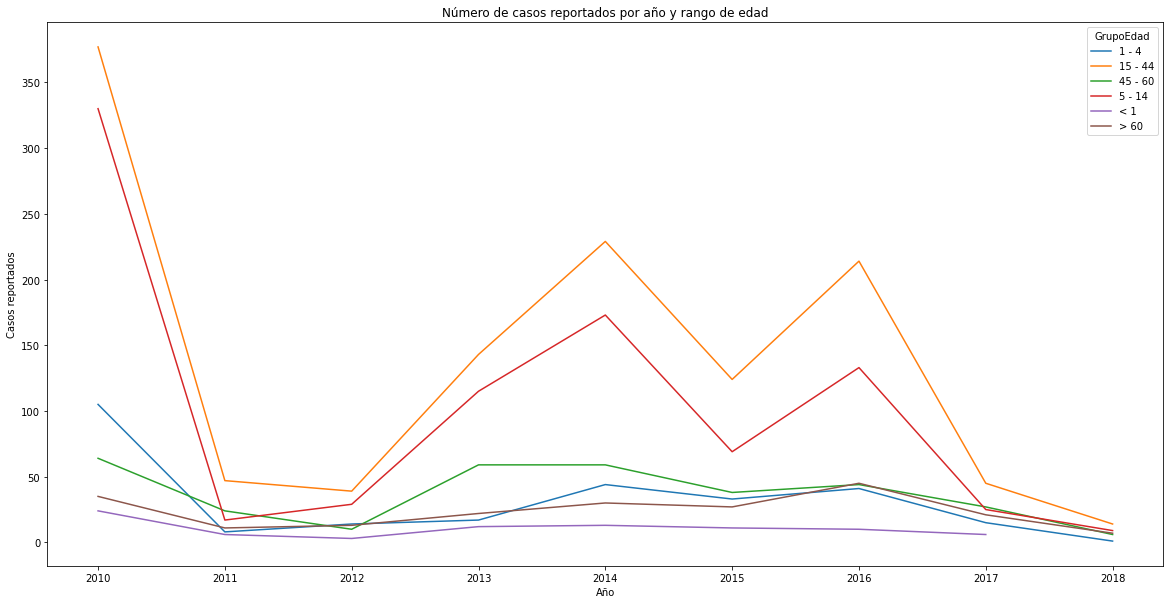

In [14]:
age_by_year = buga.groupby(["Ano", 'GrupoEdad']).size().unstack(level=1).plot(kind='line', figsize=(20,10))

age_by_year.set_xlabel('Año')
age_by_year.set_ylabel('Casos reportados')
age_by_year.set_title('Número de casos reportados por año y rango de edad')

### *Número de casos reportados por día*

Text(0.5, 1.0, 'Casos reportados por día')

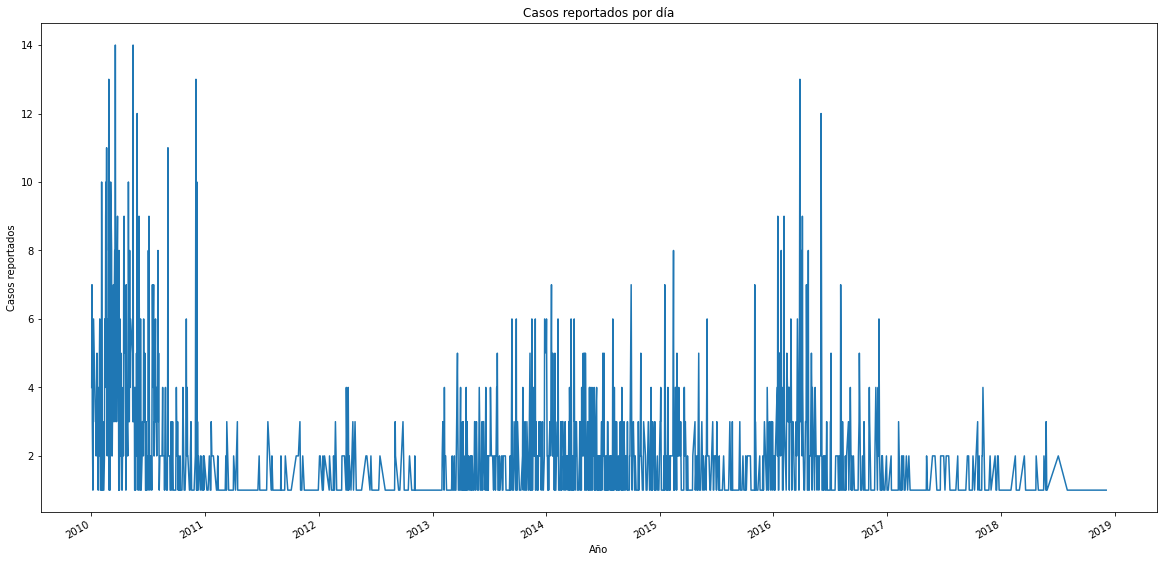

In [15]:
df["FecNot"]=pd.to_datetime(df['FecNot'])
df.sort_values(["FecNot"])
days = df['FecNot'].value_counts().plot(kind='line', figsize=(20, 10))
days.set_xlabel('Año')
days.set_ylabel('Casos reportados')
days.set_title('Casos reportados por día')

### PRUEBAS

Text(0.5, 1.0, 'Número de casos reportados en enero')

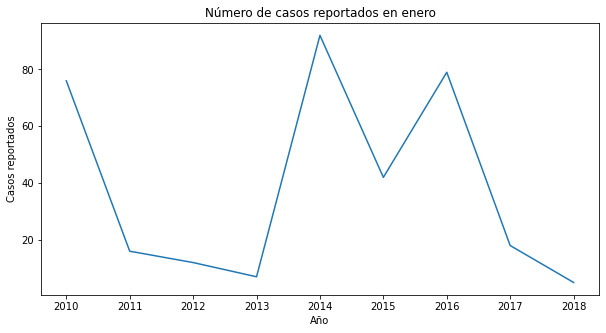

In [39]:
aux=df[df.MesOcurrencia == 'enero']
month=aux['Ano'].value_counts().sort_index().plot(kind='line', figsize=(10, 5))

month.set_xlabel('Año')
month.set_ylabel('Casos reportados')
month.set_title('Número de casos reportados en enero')

## ANÁLISIS DE SERIES DE TIEMPO

### *Pruebas de hipóstesis para determinar si el modelo es estacional o no* | DICKEY-FULLER TEST

**Hipótesis nula:** La serie de tiempo no es estacional  
**Hipótesis del investigador:** La serie de tiempo es estacional

*Si el estadístico ADF < Valor crítico entonces rechazo la hipótesis nula*  
*Si el estadístico ADF > Valor crítico entonces acepto la hipótesis nula*

### POR AÑO

In [81]:
results = adfuller(df['Ano'].value_counts().sort_index())
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    

Estadístico ADF: -3.915090
p-value: 0.001927
Valor crítico:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Rechazo Ho: La serie de tiempo es estacionaria


## Análisis por mes

### ENERO

Estadístico ADF: -2.234357
p-value: 0.194013
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Acepta Ho: La serie de tiempo no es estacionaria


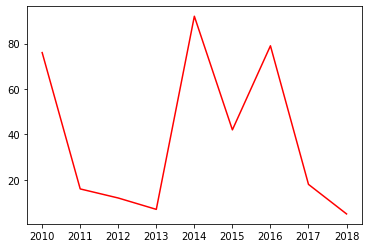

In [82]:
aux=df[df.MesOcurrencia == 'enero']
month=aux['Ano'].value_counts().sort_index()

results = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    
month.plot(color='red')    

**Dado que la serie de tiempo no es estacionaria se procedió a transformarla**

Estadístico ADF: -3.993530
p-value: 0.001445
Valor crítico:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Rechazo Ho: La serie de tiempo es estacionaria


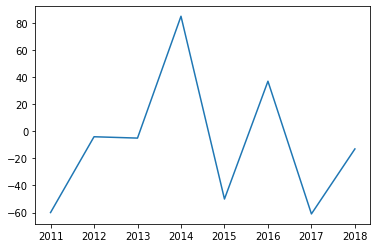

In [92]:
aux = df[df.MesOcurrencia == 'enero']
month = aux['Ano'].value_counts().sort_index().diff().dropna()
results = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")

month.plot()

### FEBRERO

Estadístico ADF: -2.232750
p-value: 0.194574
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Acepta Ho: La serie de tiempo no es estacionaria


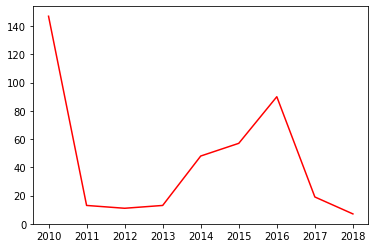

In [83]:
aux=df[df.MesOcurrencia == 'febrero']
month=aux['Ano'].value_counts().sort_index()
results = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    
month.plot(color='red')
  

**Dado que la serie de tiempo no es estacionaria se procedió a transformarla**

Estadístico ADF: 0.323463
p-value: 0.978396
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


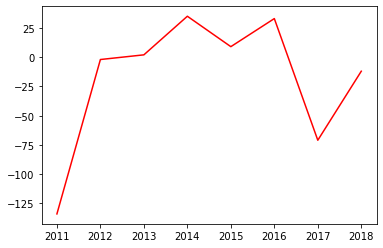

In [98]:
aux=df[df.MesOcurrencia == 'febrero']
month = aux['Ano'].value_counts().sort_index().diff().dropna()
results = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")

month.plot(color="red")

### MARZO

Estadístico ADF: -5.234426
p-value: 0.000007
Valor crítico:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Rechazo Ho: La serie de tiempo es estacionaria


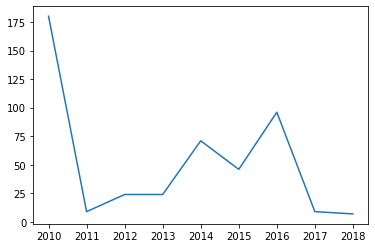

In [78]:
aux=df[df.MesOcurrencia == 'marzo']
month=aux['Ano'].value_counts().sort_index()

results = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    
month.plot()    
    

### ABRIL

Estadístico ADF: -6.453341
p-value: 0.000000
Valor crítico:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Rechazo Ho: La serie de tiempo es estacionaria


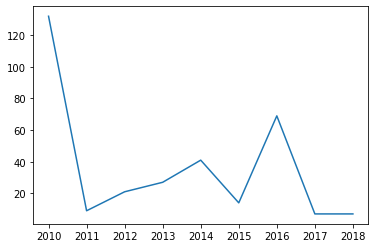

In [79]:
aux=df[df.MesOcurrencia == 'abril']
month=aux['Ano'].value_counts().sort_index()

results = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    
month.plot()
    

### MAYO

Estadístico ADF: -6.122949
p-value: 0.000000
Valor crítico:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Rechazo Ho: La serie de tiempo es estacionaria


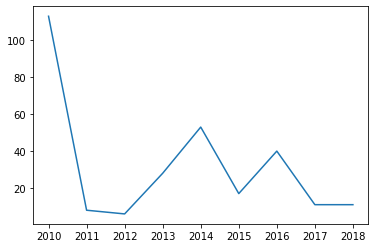

In [99]:
aux=df[df.MesOcurrencia == 'mayo']
month=aux['Ano'].value_counts().sort_index()

results = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    
month.plot()
    

### JUNIO

Estadístico ADF: -2.531894
p-value: 0.107906
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Acepta Ho: La serie de tiempo no es estacionaria


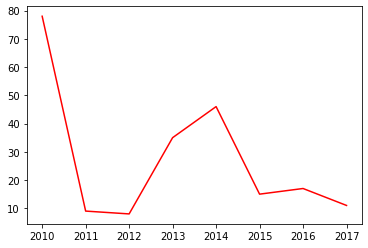

In [103]:
aux=df[df.MesOcurrencia == 'junio']
month=aux['Ano'].value_counts().sort_index()

recsults = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    
month.plot(color="red")
    

**Dado que la serie de tiempo no es estacionaria se procedió a transformarla**

Estadístico ADF: -2.816535
p-value: 0.055950
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


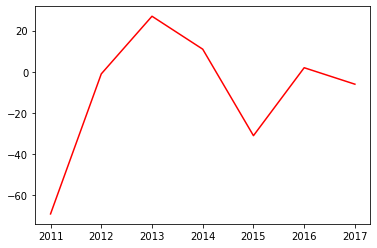

In [104]:
aux = df[df.MesOcurrencia == 'junio']
month = aux['Ano'].value_counts().sort_index().diff().dropna()
results = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")

month.plot(color="red")

### JULIO

Estadístico ADF: -2.816535
p-value: 0.055950
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


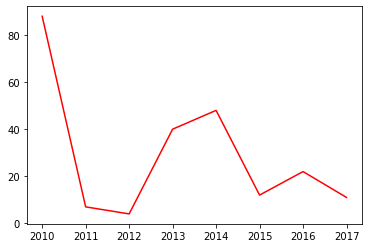

In [105]:
aux=df[df.MesOcurrencia == 'julio']
month=aux['Ano'].value_counts().sort_index()

recsults = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    
month.plot(color="red")
    

**Dado que la serie de tiempo no es estacionaria se procedió a transformarla**

Estadístico ADF: -3.243965
p-value: 0.017577
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


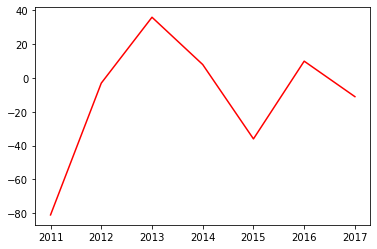

In [108]:
aux = df[df.MesOcurrencia == 'julio']
month = aux['Ano'].value_counts().sort_index().diff().dropna()
results = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")

month.plot(color="red")

### AGOSTO

Estadístico ADF: -3.243965
p-value: 0.017577
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


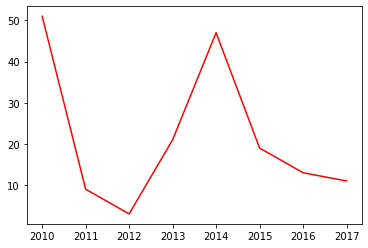

In [109]:
aux=df[df.MesOcurrencia == 'agosto']
month=aux['Ano'].value_counts().sort_index()

recsults = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    
month.plot(color="red")
    

**Dado que la serie de tiempo no es estacionaria se procedió a transformarla**

Estadístico ADF: -2.210767
p-value: 0.202361
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


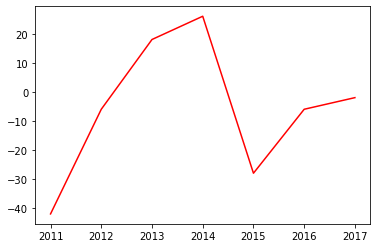

In [110]:
aux = df[df.MesOcurrencia == 'agosto']
month = aux['Ano'].value_counts().sort_index().diff().dropna()
results = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")

month.plot(color="red")

### SEPTIEMBRE

Estadístico ADF: -2.210767
p-value: 0.202361
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


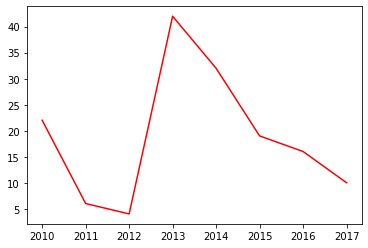

In [112]:
aux=df[df.MesOcurrencia == 'septiembre']
month=aux['Ano'].value_counts().sort_index()

recsults = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    
month.plot(color="red")
    

**Dado que la serie de tiempo no es estacionaria se procedió a transformarla**

Estadístico ADF: -2.388229
p-value: 0.145086
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Acepta Ho: La serie de tiempo no es estacionaria


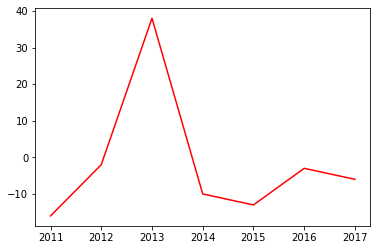

In [113]:
aux = df[df.MesOcurrencia == 'septiembre']
month = aux['Ano'].value_counts().sort_index().diff().dropna()
results = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")

month.plot(color="red")

### OCTUBRE

Estadístico ADF: -2.388229
p-value: 0.145086
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Acepta Ho: La serie de tiempo no es estacionaria


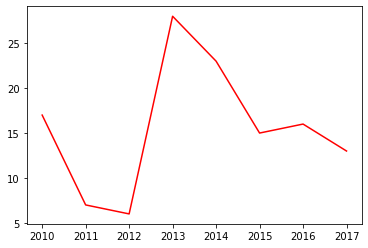

In [114]:
aux=df[df.MesOcurrencia == 'octubre']
month=aux['Ano'].value_counts().sort_index()

recsults = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    
month.plot(color="red")
    

**Dado que la serie de tiempo no es estacionaria se procedió a transformarla**

Estadístico ADF: -2.404932
p-value: 0.140349
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


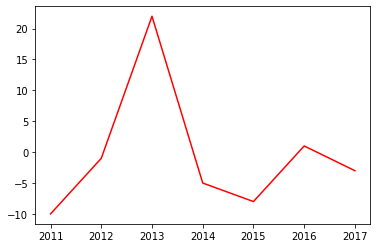

In [115]:
aux = df[df.MesOcurrencia == 'octubre']
month = aux['Ano'].value_counts().sort_index().diff().dropna()
results = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")

month.plot(color="red")

### NOVIEMBRE

Estadístico ADF: -2.404932
p-value: 0.140349
Valor crítico:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Acepta Ho: La serie de tiempo no es estacionaria


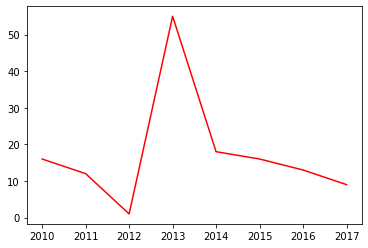

In [116]:
aux=df[df.MesOcurrencia == 'noviembre']
month=aux['Ano'].value_counts().sort_index()

recsults = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    
month.plot(color="red")
    

**Dado que la serie de tiempo no es estacionaria se procedió a transformarla**

Estadístico ADF: -3.734889
p-value: 0.003648
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Rechazo Ho: La serie de tiempo es estacionaria


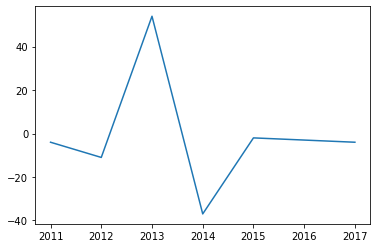

In [118]:
aux = df[df.MesOcurrencia == 'noviembre']
month = aux['Ano'].value_counts().sort_index().diff().dropna()
results = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")

month.plot()

### DICIEMBRE

Estadístico ADF: -3.734889
p-value: 0.003648
Valor crítico:
	1%: -5.354
	5%: -3.646
	10%: -2.901
Rechazo Ho: La serie de tiempo es estacionaria


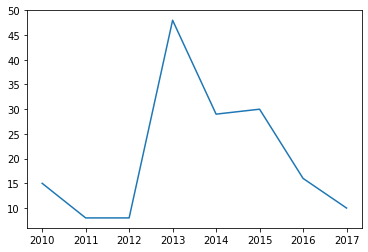

In [120]:
aux=df[df.MesOcurrencia == 'diciembre']
month=aux['Ano'].value_counts().sort_index()

recsults = adfuller(month)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    
month.plot()
    

### **Los meses que aplican un modelo lineal estacional son:**

- Enero
- Febrero
- Abril
- Mayo
- Noviembre
- Diciembre